### 1. Problem Statement
The objective of this project is to develop a machine learning model and deploy it using FastAPI to predict the current market price of laptops based on their specifications and customer feedback. The model takes input features such as brand, processor details, RAM, ratings, reviews, and discount percentage, and outputs an estimated price. This can help customers, resellers, and retailers make informed pricing decisions.

### 2️ Why Choose This Dataset

1. Realistic Laptop Specifications: Contains actual laptop features like brand, processor, RAM, and ratings.
2. Comprehensive Feature Set: Includes both numeric and categorical features relevant for price prediction.
3. Market-Relevant Target: The Current_Price column represents real selling prices.
4. Suitable for Regression: The dataset is ideal for predicting a continuous variable (price).
5. Feature Engineering Opportunities: Allows creating features like Discount% and transformed ratings/reviews.
6. Practical Use Case: Can be used for e-commerce, resale valuation, and price comparison.

### 3️ Objectives

1. Build a regression model to predict laptop prices accurately.
2. Handle missing values, skewed distributions, and categorical variables.
3. Deploy the trained model via FastAPI for real-time predictions.
4. Enable users to input laptop specifications and receive predicted prices programmatically or via a web interface.

###  Dataset Featues

| Feature       | Description                 |
|---------------| --------------------------- |
| Stars         | Customer rating (float)     |
| Ratings       | Number of ratings (int)     |
| Reviews       | Number of reviews (int)     |
| Brand         | Laptop brand (string)       |
| Processor\_Brand | Processor brand (string)    |
| Processor\_Series | Processor series (string)   |
| Generation    | Processor generation (int)  |
| RAM\_GB       | RAM size in GB (int)        |
| RAM\_Type     | Type of RAM (string)        |
| Discount%     | Discount percentage (float) |

### Target Variable:

Current_Price → The current price of the laptop (numeric).

In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Load the dataset
df = pd.read_csv('flipkart_laptops.csv')
df.head(10)

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage
0,Lenovo IdeaPad 3 Core i3 10th Gen,4.3,8,0,31990,53790,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD
1,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen)
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5,4.4,11854,1199,52990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
4,Lenovo Intel Celeron Dual Core,4.1,366,35,28490,40490,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.4,1340,166,63990,71990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
6,acer Aspire 3 Ryzen 3 Dual Core 3250U,4.2,263,55,26990,42999,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
7,HP 14s Intel Core i3 11th Gen,4.2,1556,137,35990,47206,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD
8,Lenovo V15 G2 Core i3 11th Gen,3.8,22,1,33999,59760,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
9,RedmiBook Pro Core i5 11th Gen,4.1,3641,430,39990,59999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD


## EDA Parts

In [53]:
# Extracting Parts
df['Brand'] = df['ProductName'].str.split().str[0]
df['Processor_Brand'] = df['Proccessor'].str.extract(r'(Intel|AMD)',expand=False)
df['Processor_Series'] = df['Proccessor'].str.extract(r'(Core\s*i\d|Ryzen\s*\d|Celeron)',expand=True)
df['Generation'] = df['Proccessor'].str.extract(r'(\d{1,2}th\s*Gen)',expand=False)
df['Ram_GB'] = df['Ram'].str.extract(r'(\d\s*GB)',expand=False)
df['Ram_Type'] = df['Ram'].str.extract(r'(DDR\d|LPDDR\dX?|LPDDR\d)',expand=False)
df['Storage_Type'] = df['Storage'].str.extract(r'(\s*SSD|HDD)', expand=False)
df['Storage_GB'] = df['Storage'].str.extract(r'(\d+\s*(?:GB|TB))', expand=False)

In [54]:
# drop the unuseful columns
df.drop(columns=['ProductName', 'Proccessor','Ram','Storage'], inplace=True)

In [55]:
df.head(5)

,Stars,Ratings,Reviews,Current_Price,MRP,Brand,Processor_Brand,Processor_Series,Generation,Ram_GB,Ram_Type,Storage_Type,Storage_GB
0,4.3,8,0,31990,53790,Lenovo,Intel,Core i3,10th Gen,4 GB,DDR4,SSD,256 GB
1,4.4,7067,949,59990,69999,realme,Intel,Core i5,11th Gen,NaN,NaN,NaN,NaN
2,4.3,9970,999,32990,45990,ASUS,Intel,Core i3,10th Gen,8 GB,DDR4,SSD,512 GB
3,4.4,11854,1199,52990,63539,HP,AMD,Ryzen 5,NaN,8 GB,DDR4,SSD,512 GB
4,4.1,366,35,28490,40490,Lenovo,Intel,Celeron,NaN,8 GB,DDR4,SSD,256 GB


In [56]:
df.columns.str.strip()

Index(['Stars', 'Ratings', 'Reviews', 'Current_Price', 'MRP', 'Brand',
       'Processor_Brand', 'Processor_Series', 'Generation', 'Ram_GB',
       'Ram_Type', 'Storage_Type', 'Storage_GB'],
      dtype='object')

In [57]:
# change the column name
df.rename(columns={'Ratings':'Num_Ratings',
           'Reviews':'Num_Reviews',
           'Current_Price':'Price',
           'Generation':'Processor_Generation' },inplace=True)

In [58]:
print(df.shape)
print(df.duplicated().sum())
print(df.drop_duplicates(inplace=True))
print(df.shape)

(681, 13)
122
None
(559, 13)


In [59]:
(df.info()) # Its is a summary method

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 680
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stars                 559 non-null    float64
 1   Num_Ratings           559 non-null    int64  
 2   Num_Reviews           559 non-null    int64  
 3   Price                 559 non-null    int64  
 4   MRP                   559 non-null    int64  
 5   Brand                 559 non-null    object 
 6   Processor_Brand       543 non-null    object 
 7   Processor_Series      505 non-null    object 
 8   Processor_Generation  333 non-null    object 
 9   Ram_GB                552 non-null    object 
 10  Ram_Type              552 non-null    object 
 11  Storage_Type          518 non-null    object 
 12  Storage_GB            519 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 61.1+ KB


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# values count of all columns
for col in df.columns:
    print('Count of values', col)
    print(df[col].value_counts())

Count of values Stars
Stars
0.0    103
4.3     77
4.2     75
4.4     57
4.0     51
4.1     45
4.5     35
3.9     20
3.8     19
3.5     16
3.7     15
4.6     10
3.3      8
5.0      6
3.6      6
3.4      4
4.7      3
3.1      2
4.8      2
2.9      2
4.9      1
3.0      1
3.2      1
Name: count, dtype: int64
Count of values Num_Ratings
Num_Ratings
0       103
4        10
3         9
11        7
8         7
       ... 
1060      1
1914      1
317       1
3641      1
1556      1
Name: count, Length: 287, dtype: int64
Count of values Num_Reviews
Num_Reviews
0       137
1        30
3        22
2        20
5        16
       ... 
52        1
2300      1
904       1
145       1
165       1
Name: count, Length: 149, dtype: int64
Count of values Price
Price
59990    16
63990    14
33990    12
57990    12
41990    10
         ..
53490     1
34002     1
24499     1
34250     1
40790     1
Name: count, Length: 278, dtype: int64
Count of values MRP
MRP
0        9
82990    8
62990    7
59999    6
7299

In [61]:
import numpy as np
df['Stars'].replace(0.0, np.nan, inplace=True)
df = df[df['MRP'] != 0]
df = df[df['Storage_GB'] !='2 TB']
df['Storage_GB'] = df['Storage_GB'].replace({'500 GB':'512 GB',})

In [62]:
df.isnull().sum()/len(df)*100

Stars                   18.214936
Num_Ratings              0.000000
Num_Reviews              0.000000
Price                    0.000000
MRP                      0.000000
Brand                    0.000000
Processor_Brand          2.367942
Processor_Series         9.107468
Processor_Generation    40.072860
Ram_GB                   1.092896
Ram_Type                 1.092896
Storage_Type             6.921676
Storage_GB               6.739526
dtype: float64

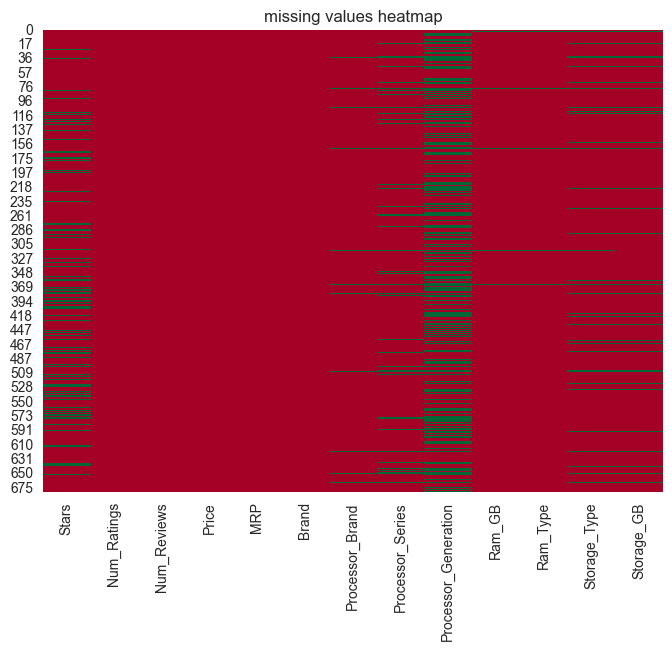

In [63]:
# show the null values through by graph
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap='RdYlGn')
plt.title('missing values heatmap')
plt.show()

In [64]:
df.dropna(subset=['Ram_Type','Ram_GB','Processor_Brand'],inplace=True)
df.shape

(535, 13)

In [65]:
df.isnull().sum()/len(df)*100

Stars                   18.504673
Num_Ratings              0.000000
Num_Reviews              0.000000
Price                    0.000000
MRP                      0.000000
Brand                    0.000000
Processor_Brand          0.000000
Processor_Series         6.915888
Processor_Generation    38.691589
Ram_GB                   0.000000
Ram_Type                 0.000000
Storage_Type             4.485981
Storage_GB               4.485981
dtype: float64

In [66]:
print(df[['Storage_GB','Storage_Type','Processor_Generation','Stars','Processor_Series']].head(5))
print(df[['Storage_GB','Storage_Type','Processor_Generation','Stars','Processor_Series']].dtypes)
print(df[['Storage_GB','Storage_Type','Processor_Generation','Stars','Processor_Series']].isnull().sum())

  Storage_GB Storage_Type Processor_Generation  Stars Processor_Series
0     256 GB          SSD             10th Gen    4.3          Core i3
2     512 GB          SSD             10th Gen    4.3          Core i3
3     512 GB          SSD                  NaN    4.4          Ryzen 5
4     256 GB          SSD                  NaN    4.1          Celeron
5     512 GB          SSD                  NaN    4.4          Ryzen 5
Storage_GB               object
Storage_Type             object
Processor_Generation     object
Stars                   float64
Processor_Series         object
dtype: object
Storage_GB               24
Storage_Type             24
Processor_Generation    207
Stars                    99
Processor_Series         37
dtype: int64


In [67]:
# Fill the data
df['Storage_GB'].fillna(df['Storage_GB'].mode()[0], inplace=True)
df['Storage_Type'].fillna(df['Storage_Type'].mode()[0], inplace=True)
df['Processor_Generation'].fillna(df['Processor_Generation'].mode()[0], inplace=True)
df['Processor_Series'].fillna(df['Processor_Series'].mode()[0], inplace=True)

In [68]:
# Fill the data through sklearn
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
si.fit(df[['Stars']])

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [69]:
df['Stars'] = si.transform(df[['Stars']])

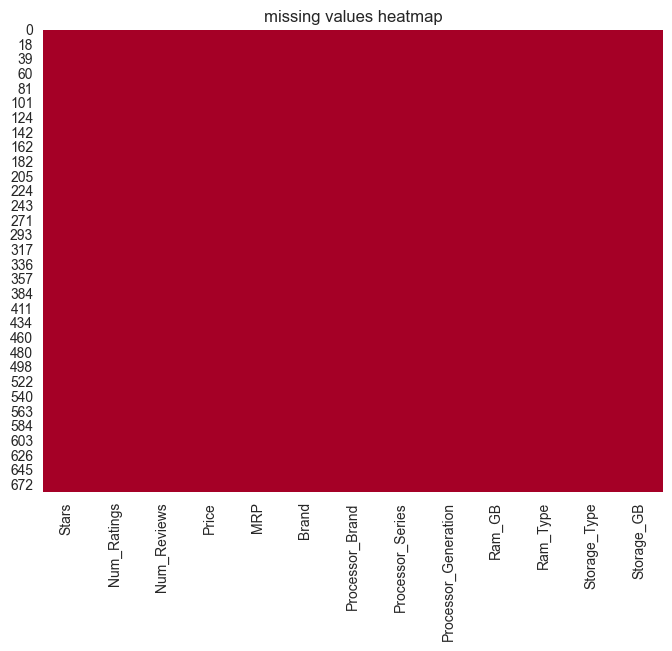

In [70]:
# again check null values graph after fill the missing values
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap='RdYlGn')
plt.title('missing values heatmap')
plt.show()

In [71]:
# what data fill these columns
print(df['Processor_Series'].mode())
print(df['Processor_Generation'].mode())
print(df['Ram_Type'].mode())
print(df['Ram_GB'].mode())
print(df['Stars'].median())

0    Core i3
Name: Processor_Series, dtype: object
0    11th Gen
Name: Processor_Generation, dtype: object
0    DDR4
Name: Ram_Type, dtype: object
0    8 GB
Name: Ram_GB, dtype: object
4.2


In [72]:
# Feature engineering
df['discount'] = ((df['MRP']-df['Price'])/df['MRP'])*100
df.drop('MRP',axis=1,inplace=True)

In [73]:
def convert_storage(val):
    val = str(val).strip()
    if "TB" in val:
        return float(val.replace("TB", "")) * 1024   # 1 TB = 1024 GB
    elif "GB" in val:
        return float(val.replace("GB", ""))
    else:
        return None

df['Storage_GB_clean'] = df['Storage_GB'].apply(convert_storage)

In [74]:
df.head(10)

,Stars,Num_Ratings,Num_Reviews,Price,Brand,Processor_Brand,Processor_Series,Processor_Generation,Ram_GB,Ram_Type,Storage_Type,Storage_GB,discount,Storage_GB_clean
0,4.3,8,0,31990,Lenovo,Intel,Core i3,10th Gen,4 GB,DDR4,SSD,256 GB,40.527979,256.0
2,4.3,9970,999,32990,ASUS,Intel,Core i3,10th Gen,8 GB,DDR4,SSD,512 GB,28.267015,512.0
3,4.4,11854,1199,52990,HP,AMD,Ryzen 5,11th Gen,8 GB,DDR4,SSD,512 GB,16.602402,512.0
4,4.1,366,35,28490,Lenovo,Intel,Celeron,11th Gen,8 GB,DDR4,SSD,256 GB,29.636947,256.0
5,4.4,1340,166,63990,ASUS,AMD,Ryzen 5,11th Gen,8 GB,DDR4,SSD,512 GB,11.112655,512.0
6,4.2,263,55,26990,acer,AMD,Ryzen 3,11th Gen,8 GB,DDR4,SSD,256 GB,37.231098,256.0
7,4.2,1556,137,35990,HP,Intel,Core i3,11th Gen,8 GB,DDR4,SSD,256 GB,23.759692,256.0
8,3.8,22,1,33999,Lenovo,Intel,Core i3,11th Gen,8 GB,DDR4,SSD,512 GB,43.107430,512.0
9,4.1,3641,430,39990,RedmiBook,Intel,Core i5,11th Gen,8 GB,DDR4,SSD,512 GB,33.348889,512.0
10,4.2,25,5,52990,HP,Intel,Core i5,11th Gen,8 GB,DDR4,SSD,512 GB,6.876615,512.0


In [75]:
df.drop(columns=['Storage_GB'], inplace=True)

In [76]:
df['Ram_GB'] = df['Ram_GB'].str.extract(r'(\d+)').astype('float64')

In [77]:
df.describe()

,Stars,Num_Ratings,Num_Reviews,Price,Ram_GB,discount,Storage_GB_clean
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,4.155701,542.708411,64.889720,48055.256075,7.147664,23.321834,552.912150
std,0.301246,1422.198848,169.737727,14031.133493,1.481050,9.170696,248.479431
min,2.900000,0.000000,0.000000,15990.000000,4.000000,0.106256,128.000000
25%,4.000000,7.000000,1.000000,37990.000000,6.000000,17.505337,512.000000
50%,4.200000,78.000000,9.000000,46890.000000,8.000000,23.505303,512.000000
75%,4.300000,400.000000,49.500000,59990.000000,8.000000,29.250004,512.000000
max,5.000000,17745.000000,2300.000000,102000.000000,8.000000,54.951094,1024.000000


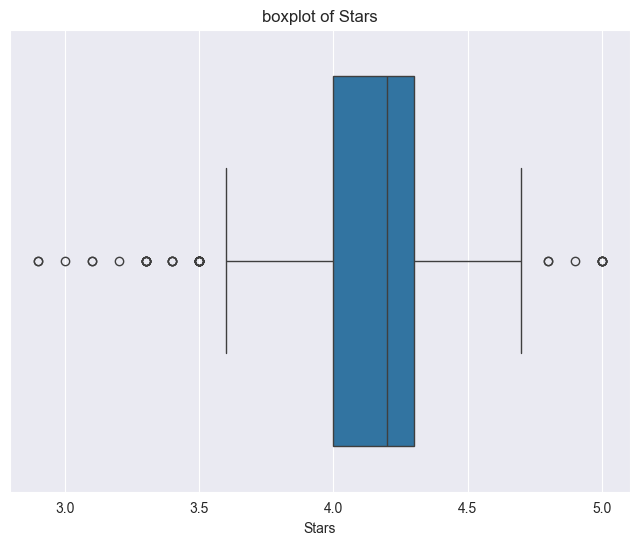

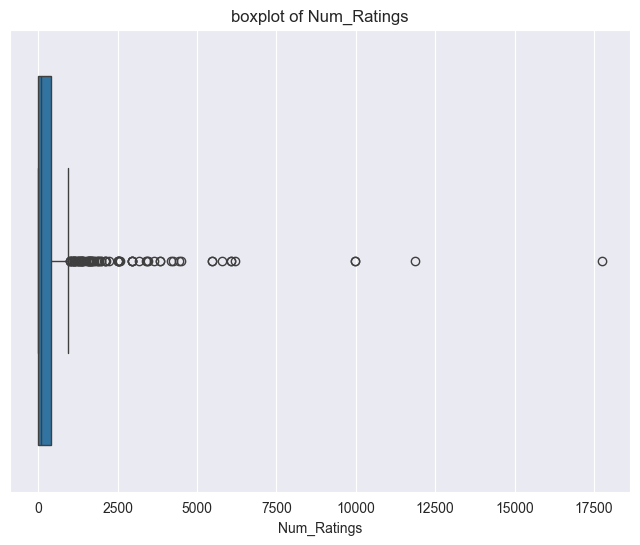

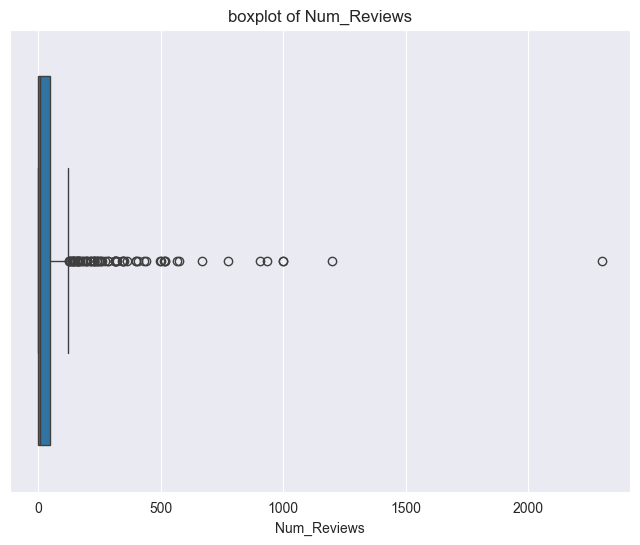

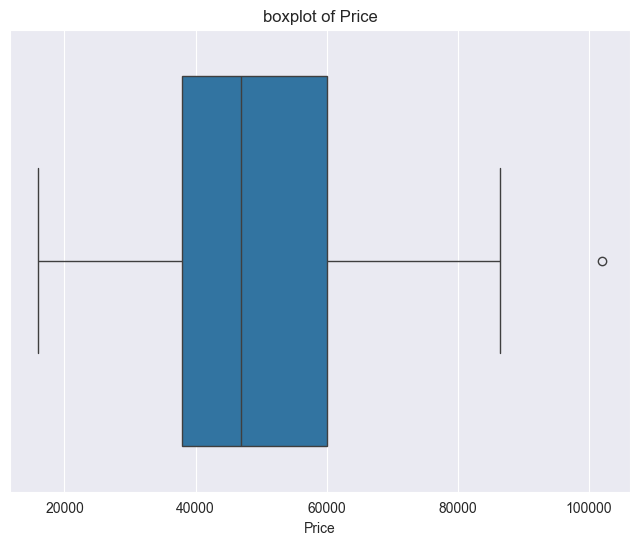

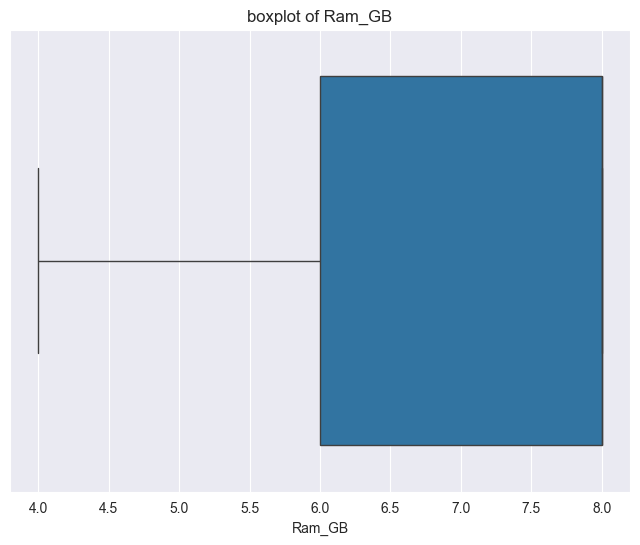

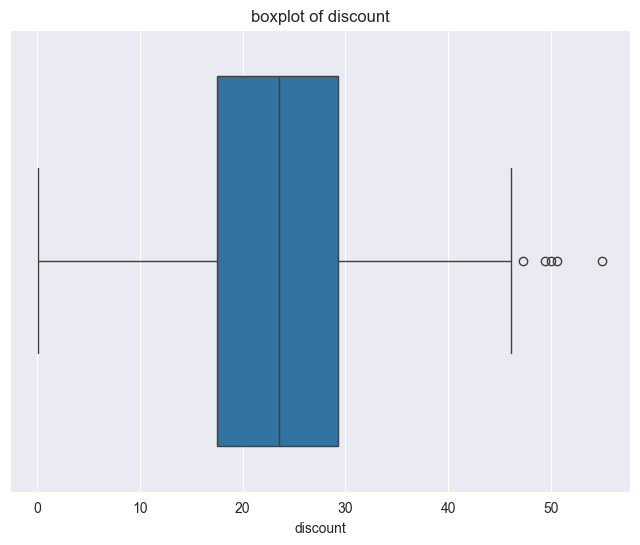

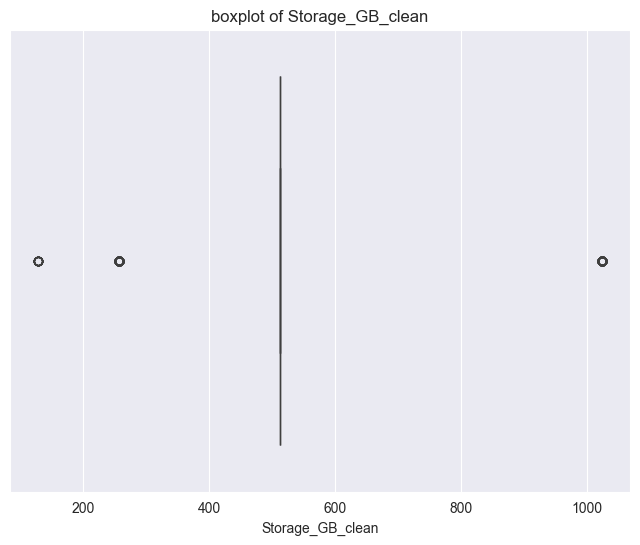

In [78]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df[col], orient='h')
    plt.title('boxplot of ' + col)
    plt.show()

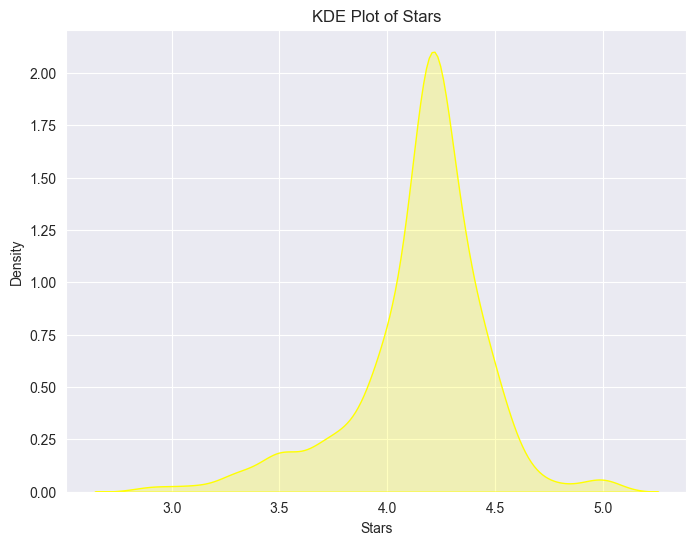

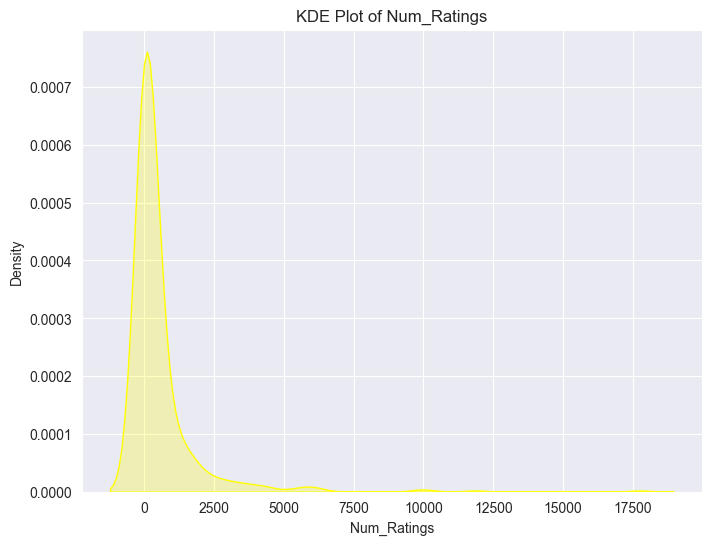

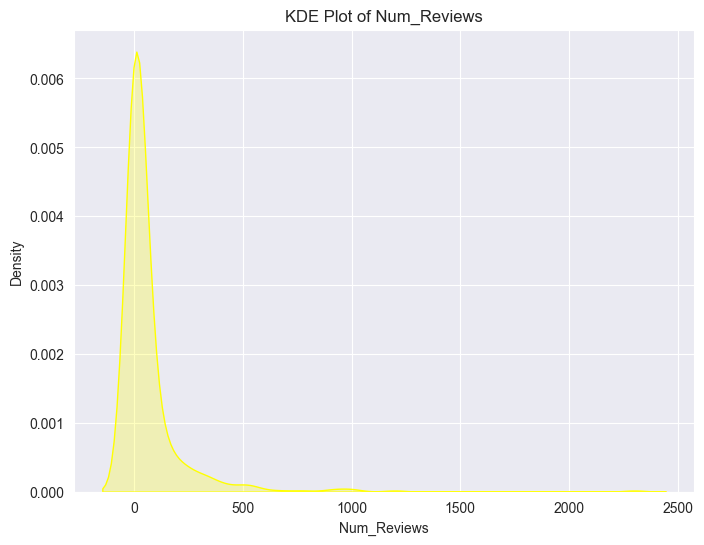

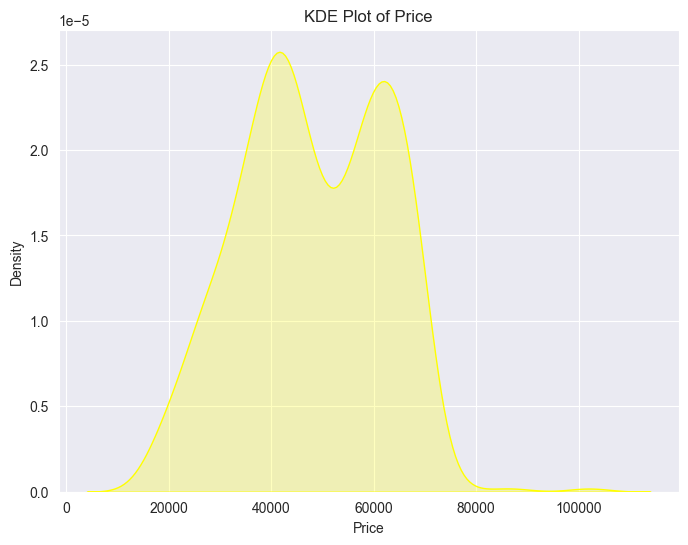

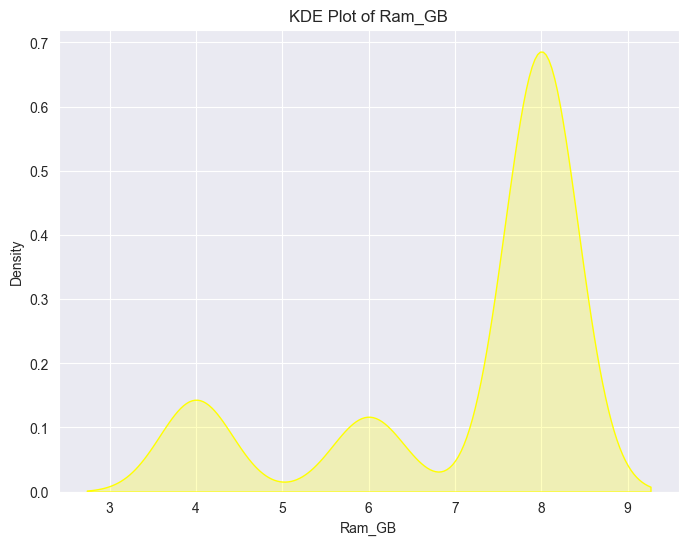

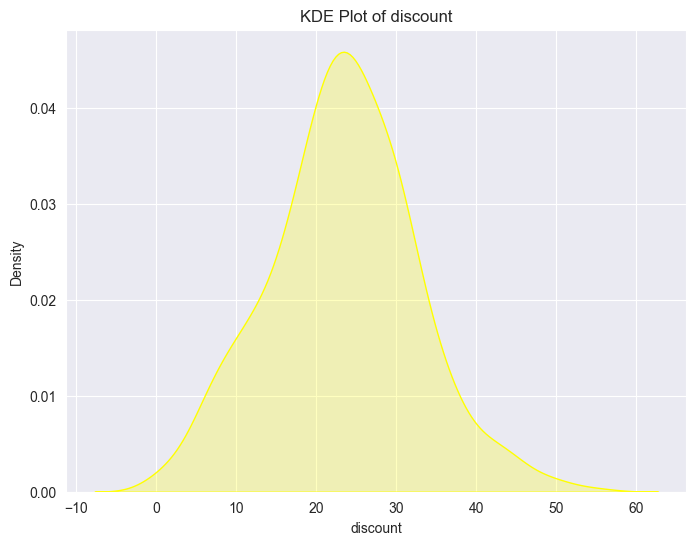

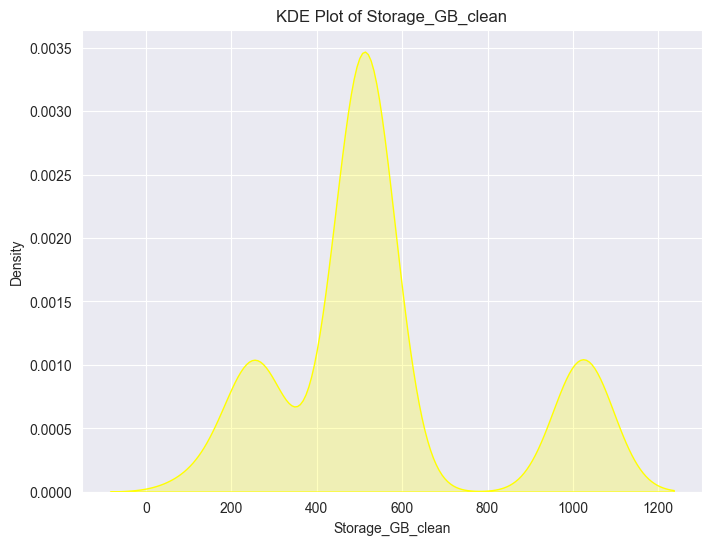

In [79]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.kdeplot(df[col], fill=True, color="yellow")
    plt.title('KDE Plot of ' + col)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


In [80]:
outlier_cols = ['Num_Reviews','Num_Ratings']
q1 = df[outlier_cols].quantile(0.25)
q3 = df[outlier_cols].quantile(0.75)
iqr = q3 - q1

min_r = q1 - 1.5 * iqr
max_r = q3 + 1.5 * iqr
clean_outliers = df[df[outlier_cols]<=max_r]

In [81]:
# Scaling Part
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [82]:
# Feature and target
X = df.drop('Price', axis=1)
y = df['Price']

In [83]:
cat_cols = X.select_dtypes(include='object').columns
num_columns = X.select_dtypes(include=[np.number]).columns

In [84]:
# columns transformation
ct = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols), ('num', StandardScaler(), num_columns) ])
X_transformer = ct.fit_transform(X)

In [85]:
# ohe features names
ohe = ct.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_cols)
# Final features names
feature_name = list(ohe_features) + list(num_columns)

# create a new dataset
X_new = pd.DataFrame(X_transformer.toarray() if hasattr(X_transformer,'toarray') else X_transformer, columns=feature_name)

In [86]:
# checking correlation
df = pd.concat([X_new, y.reset_index(drop=True)], axis=1)

In [87]:
df.head(10)

,Brand_ASUS,Brand_AXL,Brand_Avita,Brand_DELL,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Mi,Brand_Nokia,...,Ram_Type_LPDDR5,Storage_Type_ SSD,Storage_Type_HDD,Stars,Num_Ratings,Num_Reviews,Ram_GB,discount,Storage_GB_clean,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.479455,-0.376325,-0.382652,-2.127280,1.877965,-1.196035,31990
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.479455,6.634877,5.508407,0.576033,0.539742,-0.164804,32990
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.811720,7.960826,6.687798,0.576033,-0.733393,-0.164804,52990
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.185075,-0.124366,-0.176258,0.576033,0.689263,-1.196035,28490
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.811720,0.561130,0.596243,0.576033,-1.332571,-0.164804,63990
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.147190,-0.196857,-0.058319,0.576033,1.518127,-1.196035,26990
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.147190,0.713149,0.425231,0.576033,0.047790,-1.196035,35990
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.181870,-0.366472,-0.376755,0.576033,2.159499,-0.164804,33999
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.185075,2.180561,2.153039,0.576033,1.094403,-0.164804,39990
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.147190,-0.364360,-0.353167,0.576033,-1.794914,-0.164804,52990


## Start of Machine Learning Parts

In [88]:
Features = df.drop('Price', axis=1)
target = df['Price']
print(type(Features))
print(type(target))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [89]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=7)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(428, 47) (428,)
(107, 47) (107,)


In [90]:
# Model Selection
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
# Predict the model
y_pred = model.predict(X_test)

In [92]:
print(model.coef_)
print(model.intercept_)

[  2935.55857586   2055.52805067  -2020.96781842   6996.30712894
   3686.75250642 -10396.21948948   5462.90500808   2093.56751394
  -3305.95554368  -2647.52613904 -11166.55625889   -619.34870945
   4132.66046843   3221.69851491  -2407.74123415   1979.33742587
  -5688.93706602   5688.93706602 -24899.54842418 -14151.41025244
   2975.25598082   8892.87341594  -6915.8872452   11362.62114528
  22736.09537977  -3563.76648198  -2449.50755101   1713.47343611
    995.32898051      0.           4132.66046843    380.15965648
  -1208.34850854 -12750.40612923  -4221.89094795  10279.95436927
  -6592.96426245   3598.24883483   9687.05813553   3498.77563744
  -3498.77563744   1319.40430953  -1360.83591514    809.83602527
    918.28810992  -2163.63295772   2596.0378938 ]
49399.71169039656


In [93]:
# Model Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

R2: 0.80
MAE: 4446.74
MSE: 36237344.52
RMSE: 6019.75


In [94]:
# checking underfitting and overfitting
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8214903413578963
0.7997811921229616


# Deploy The Model

In [96]:
import joblib

# Save trained model
joblib.dump(model, 'linear_model.pkl')

# Save ColumnTransformer
joblib.dump(ct, 'preprocessor.pkl')

# Save feature names after transformation
cat_cols = X.select_dtypes(include='object').columns
num_columns = X.select_dtypes(include=[np.number]).columns

feature_names = list(ct.named_transformers_['cat'].get_feature_names_out(cat_cols)) + list(num_columns)
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

In [97]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import joblib
import numpy as np

# Load saved objects
model = joblib.load('linear_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')
feature_names = joblib.load('feature_names.pkl')

app = FastAPI(title="Laptop Price Prediction API")

# Input schema - match your training columns
class LaptopInput(BaseModel):
    Brand: str
    Processor_Brand: str
    Processor_Series: str
    Processor_Generation: str
    Ram_GB: float
    Ram_Type: str
    Storage_Type: str
    Storage_GB_clean: float
    Stars: float
    Num_Ratings: int
    Num_Reviews: int
    discount: float

@app.get("/")
def home():
    return {"message": "Laptop Price Prediction API running!"}

@app.post("/predict")
def predict_price(data: LaptopInput):
    # Convert input JSON to DataFrame
    input_df = pd.DataFrame([data.dict()])

    # Ensure numerical columns are float
    num_cols = ['Ram_GB','Storage_GB_clean','Stars','Num_Ratings','Num_Reviews','discount']
    input_df[num_cols] = input_df[num_cols].astype(float)

    # Transform input using saved ColumnTransformer
    X_transformed = preprocessor.transform(input_df)

    # Convert transformed input to DataFrame with correct feature names
    X_df = pd.DataFrame(X_transformed.toarray() if hasattr(X_transformed,'toarray') else X_transformed,
                        columns=feature_names)

    # Ensure all columns exist (handle missing dummy columns)
    for col in feature_names:
        if col not in X_df.columns:
            X_df[col] = 0
    X_df = X_df[feature_names]

    # Predict price
    prediction = model.predict(X_df)

    return {"Predicted_Price": float(prediction[0])}

### Methodology

Data Cleaning & Preprocessing:
Handle missing values, normalize skewed columns, and create new features like Discount%.

Feature Engineering:
Encode categorical variables (OneHotEncoder).
Standardize numeric features (StandardScaler).

Model Training:
Split data into train/test sets.
Train Linear Regression and evaluate using R² and MSE.

Deployment:
Save model and transformer (joblib).
Create FastAPI endpoints for home and predict.